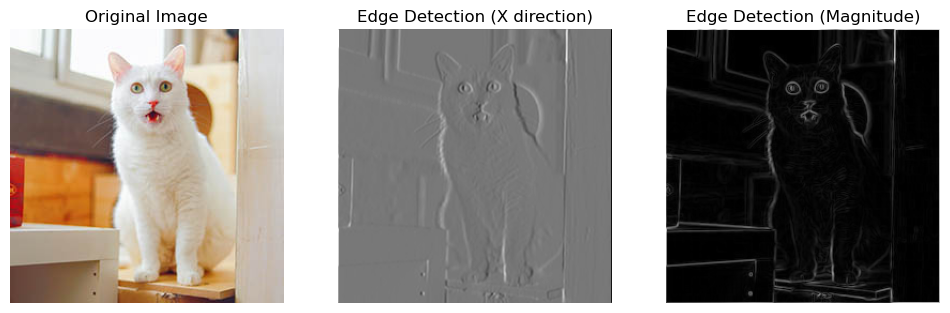

In [1]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# 1. 加载图片
image_path = '9f84357a0c25a8df38a24d563afa1eec.jpg'  # 替换为你的猫的图片路径
image = Image.open(image_path).convert('RGB')

# 2. 图片预处理：转换为张量并归一化到[0, 1]
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # 将图片调整为 256x256 大小
    transforms.ToTensor()           # 将图片转换为 [C, H, W]，像素归一化到 [0, 1]
])
image_tensor = transform(image).unsqueeze(0)  # 增加 batch 维度，形状为 [1, C, H, W]

# 3. Sobel 边缘检测算子（x方向和y方向的卷积核）
sobel_x = torch.tensor([[[[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]]]], dtype=torch.float32)  # 形状为 [1, 1, 3, 3]
sobel_y = torch.tensor([[[[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]]]], dtype=torch.float32)  # 形状为 [1, 1, 3, 3]

# 4. 对每个通道（R, G, B）分别进行卷积
image_gray = image_tensor.mean(dim=1, keepdim=True)  # 将 RGB 图像转换为灰度图，形状为 [1, 1, H, W]

# 5. 进行卷积，使用 PyTorch 的 F.conv2d 实现边缘检测
import torch.nn.functional as F

edge_x = F.conv2d(image_gray, sobel_x, padding=1)  # 使用 padding=1 保持原始大小
edge_y = F.conv2d(image_gray, sobel_y, padding=1)

# 6. 计算梯度幅值 (gradient magnitude)
edge_magnitude = torch.sqrt(edge_x ** 2 + edge_y ** 2)

# 7. 结果可视化
plt.figure(figsize=(12, 6))

# 原始图像
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# X 方向的边缘
plt.subplot(1, 3, 2)
plt.imshow(edge_x.squeeze().detach().numpy(), cmap='gray')
plt.title('Edge Detection (X direction)')
plt.axis('off')

# 边缘检测结果（结合 X 和 Y 方向）
plt.subplot(1, 3, 3)
plt.imshow(edge_magnitude.squeeze().detach().numpy(), cmap='gray')
plt.title('Edge Detection (Magnitude)')
plt.axis('off')

# 显示图片
plt.show()